<a href="https://colab.research.google.com/github/suaaati/Handwritten_Digit_Recognition-/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [7]:
X,y = fetch_openml('MNIST_784', version = 1 , return_X_y = True)

In [8]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


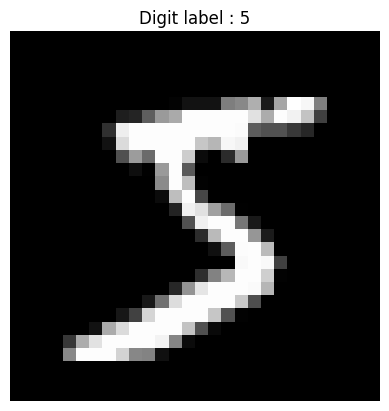

In [9]:
plt.imshow(X.iloc[0].values.reshape(28,28),cmap = 'gray')
plt.title(f"Digit label : {y.iloc[0]}")
plt.axis("off")
plt.show()

In [10]:
y = y.astype(int)

X = X/255

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size = 0.2, random_state = 42
)

In [12]:
model = LogisticRegression(
    multi_class = 'multinomial',
    solver = 'lbfgs',
    max_iter = 1000
)

In [13]:
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [14]:
y_pred = model.predict(X_test)


In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("model accuracy:" , accuracy)

model accuracy: 0.9202142857142858


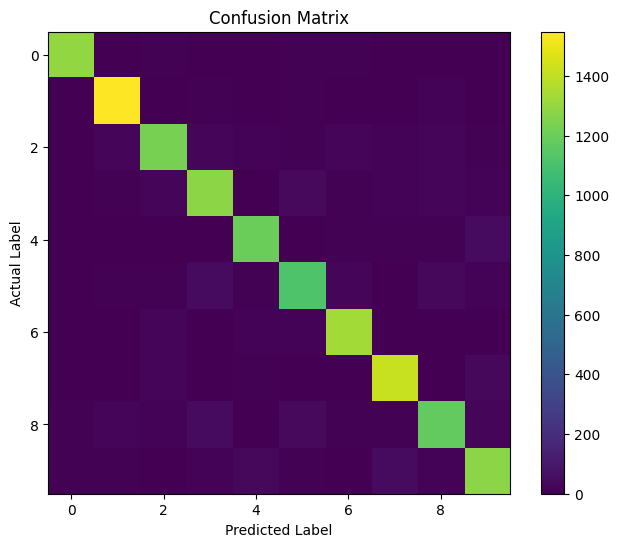

In [16]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (8,6))
plt.imshow(cm)
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

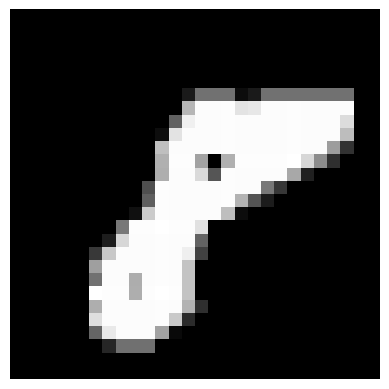

Predicted Digit: 8


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
sample = X_test.iloc[33]

plt.imshow(sample.values.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show()

print("Predicted Digit:", model.predict([sample])[0])
